## Project2_Regression_Group04_Suraj_Divyank

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
train = pd.read_csv("reg.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [4]:
#Basic info about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#From info it is apparent that the dataset contains numerical and categorical features so lets find the count of these
#features.
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [6]:
print(train[numerical_feats].columns)
print("*"*100)
print(train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

In [7]:
#So lets try to observe the missing data in every column of the dataset.
pd.options.display.max_rows = 4000
miss_tot = train.isnull().sum().sort_values(ascending=False)
miss_percent = (train.isnull().sum()/len(train)).sort_values(ascending=False)
miss_data = pd.concat([miss_tot, miss_percent ], axis=1, keys=['miss_tot', 'miss_percent'])
miss_data


,miss_tot,miss_percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


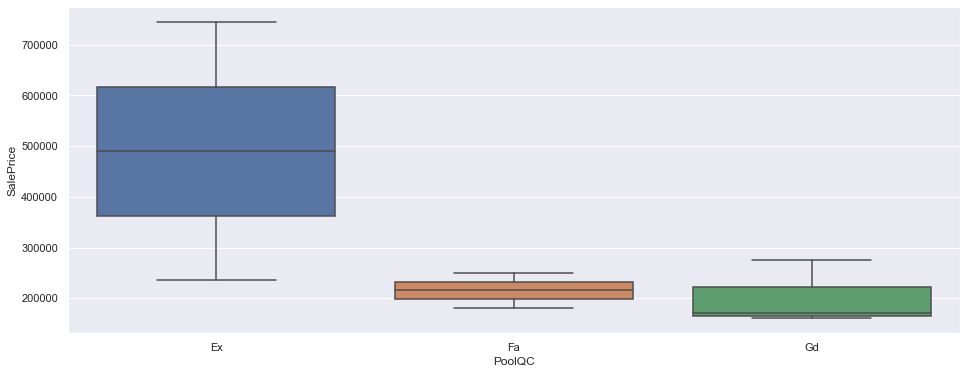

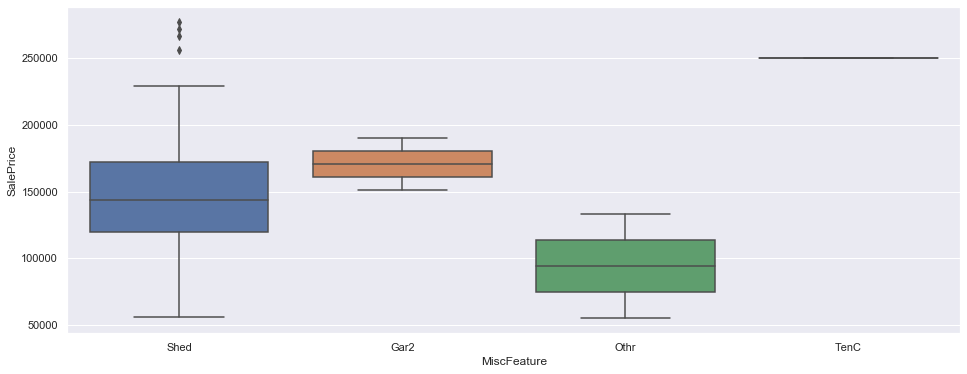

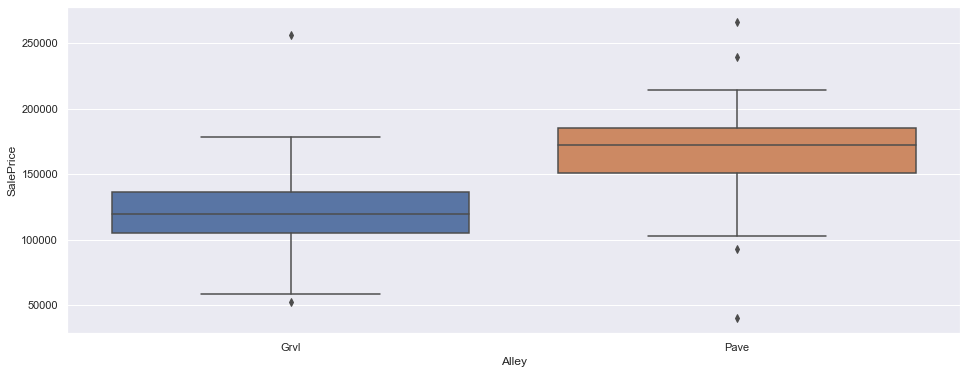

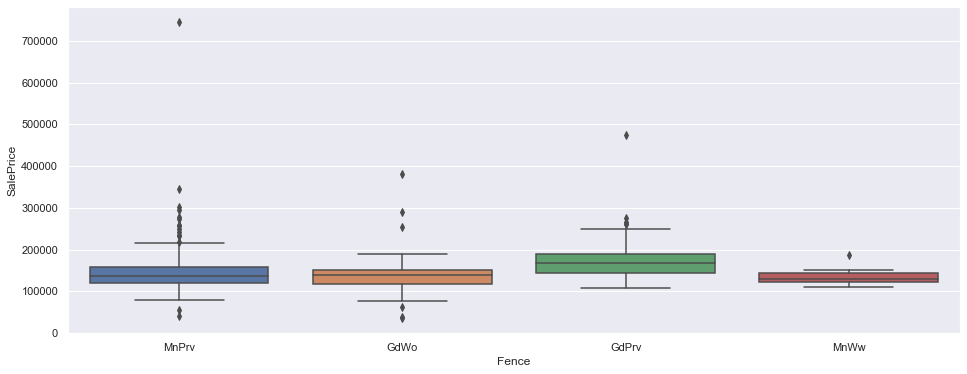

In [118]:
#From missing data info it is quite evident that PoolQC,Alley,MiscFeature and fence have highest 
#number of missing values as NA.Here PoolQC contains 99.5% of missing data as it resembles the quality of pool and as 99.5%
#do not contain pool so this is not completely missing at random and hence there is no need to drop it.Similarly the other
#features do contain NA but it is in some context here and do not represent missing data.These features do have impact on 
#output as it's evident from the below boxplot and need not be dropped for furthur analyses.

for col in ['PoolQC','MiscFeature','Alley','Fence']:
    
            plt.figure(figsize=(16, 6))
            sns.boxplot(df[col],df['SalePrice'])    

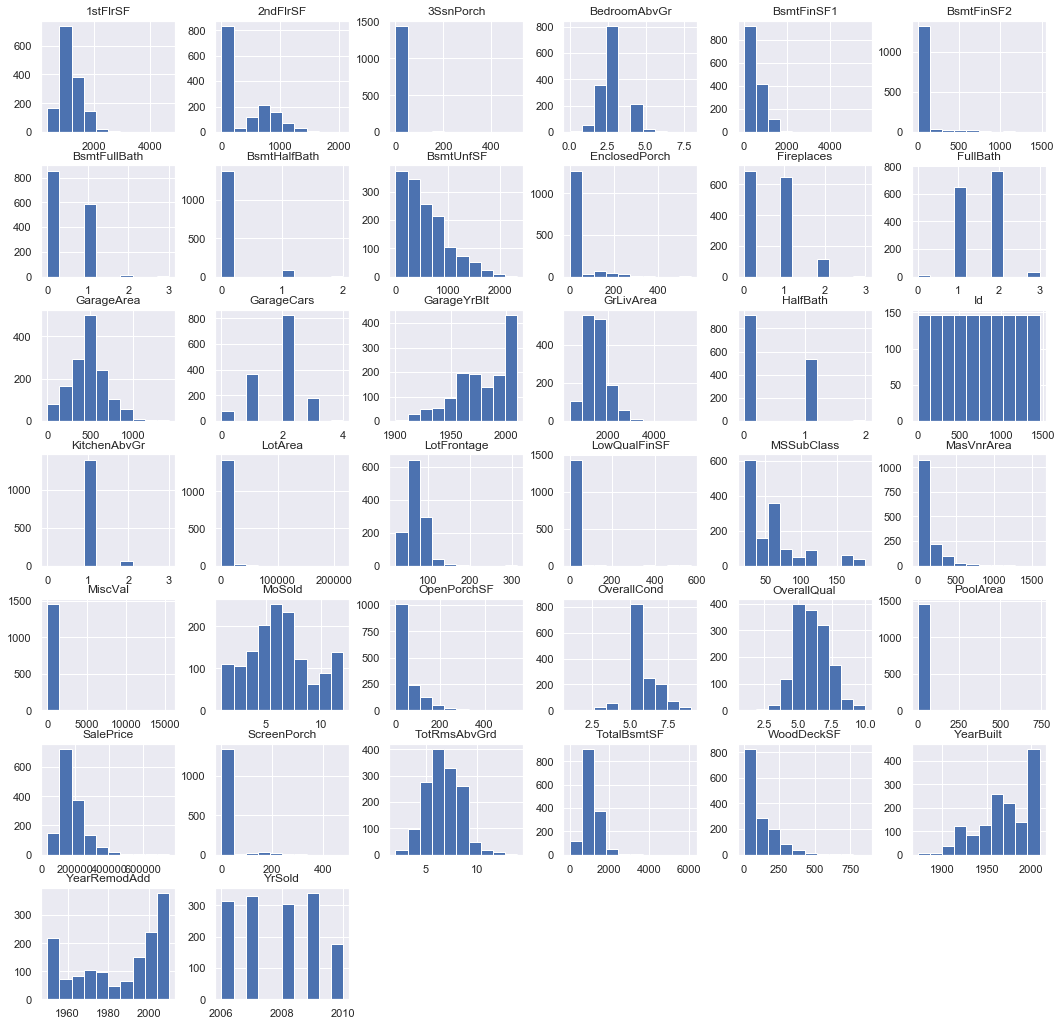

In [119]:
#plotting bar charts for all the numerical variables present in the data.

train[list(numerical_feats)].hist(figsize = (18,18));

#From the below hist graphs we can see that some of the variables are right skewed and some are left skewed. This 
#skewness can be taken care when we apply normalization ahead in our analysis. 

In [8]:
#Just observing the variables which are having highest correlation with the dependent variable.
pd.options.display.max_rows = 5000
corr = train.corr()
print (corr['SalePrice'].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

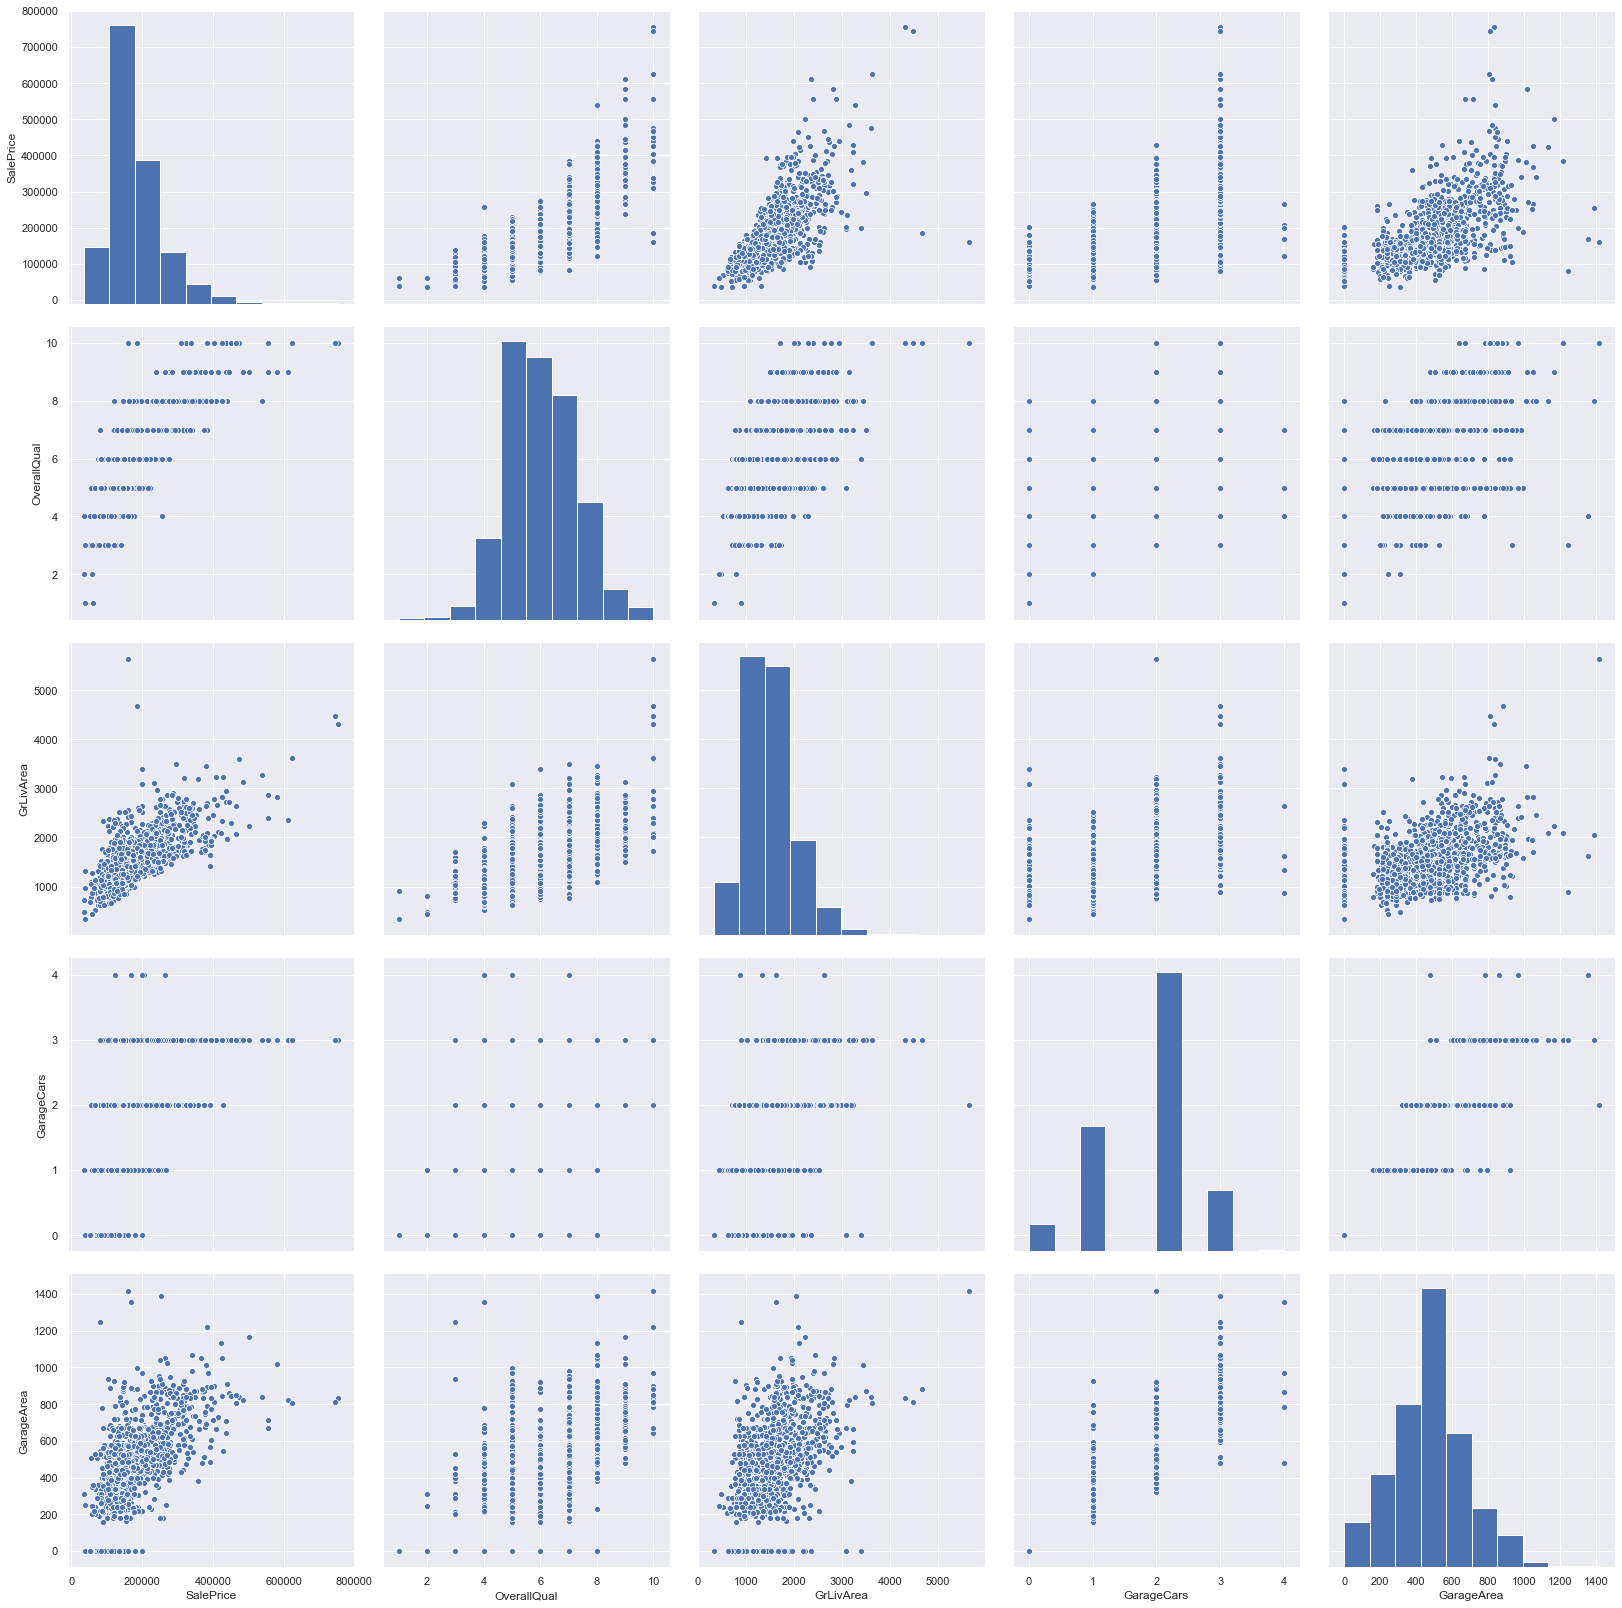

In [60]:
#Lets try to examine the top 4 highly correalted variables with the target variable.
import matplotlib.pyplot as plt
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea']
sns.pairplot(train[cols], height = 4.5)
plt.show()
#We infer from the below plots that if finishing of the house is excellent then generally the sale price is quite high.
#The ground living area has quite a good amount of linear relationship with the target variable.If garage car holding
#capacity and area are less then sale price is quite less.

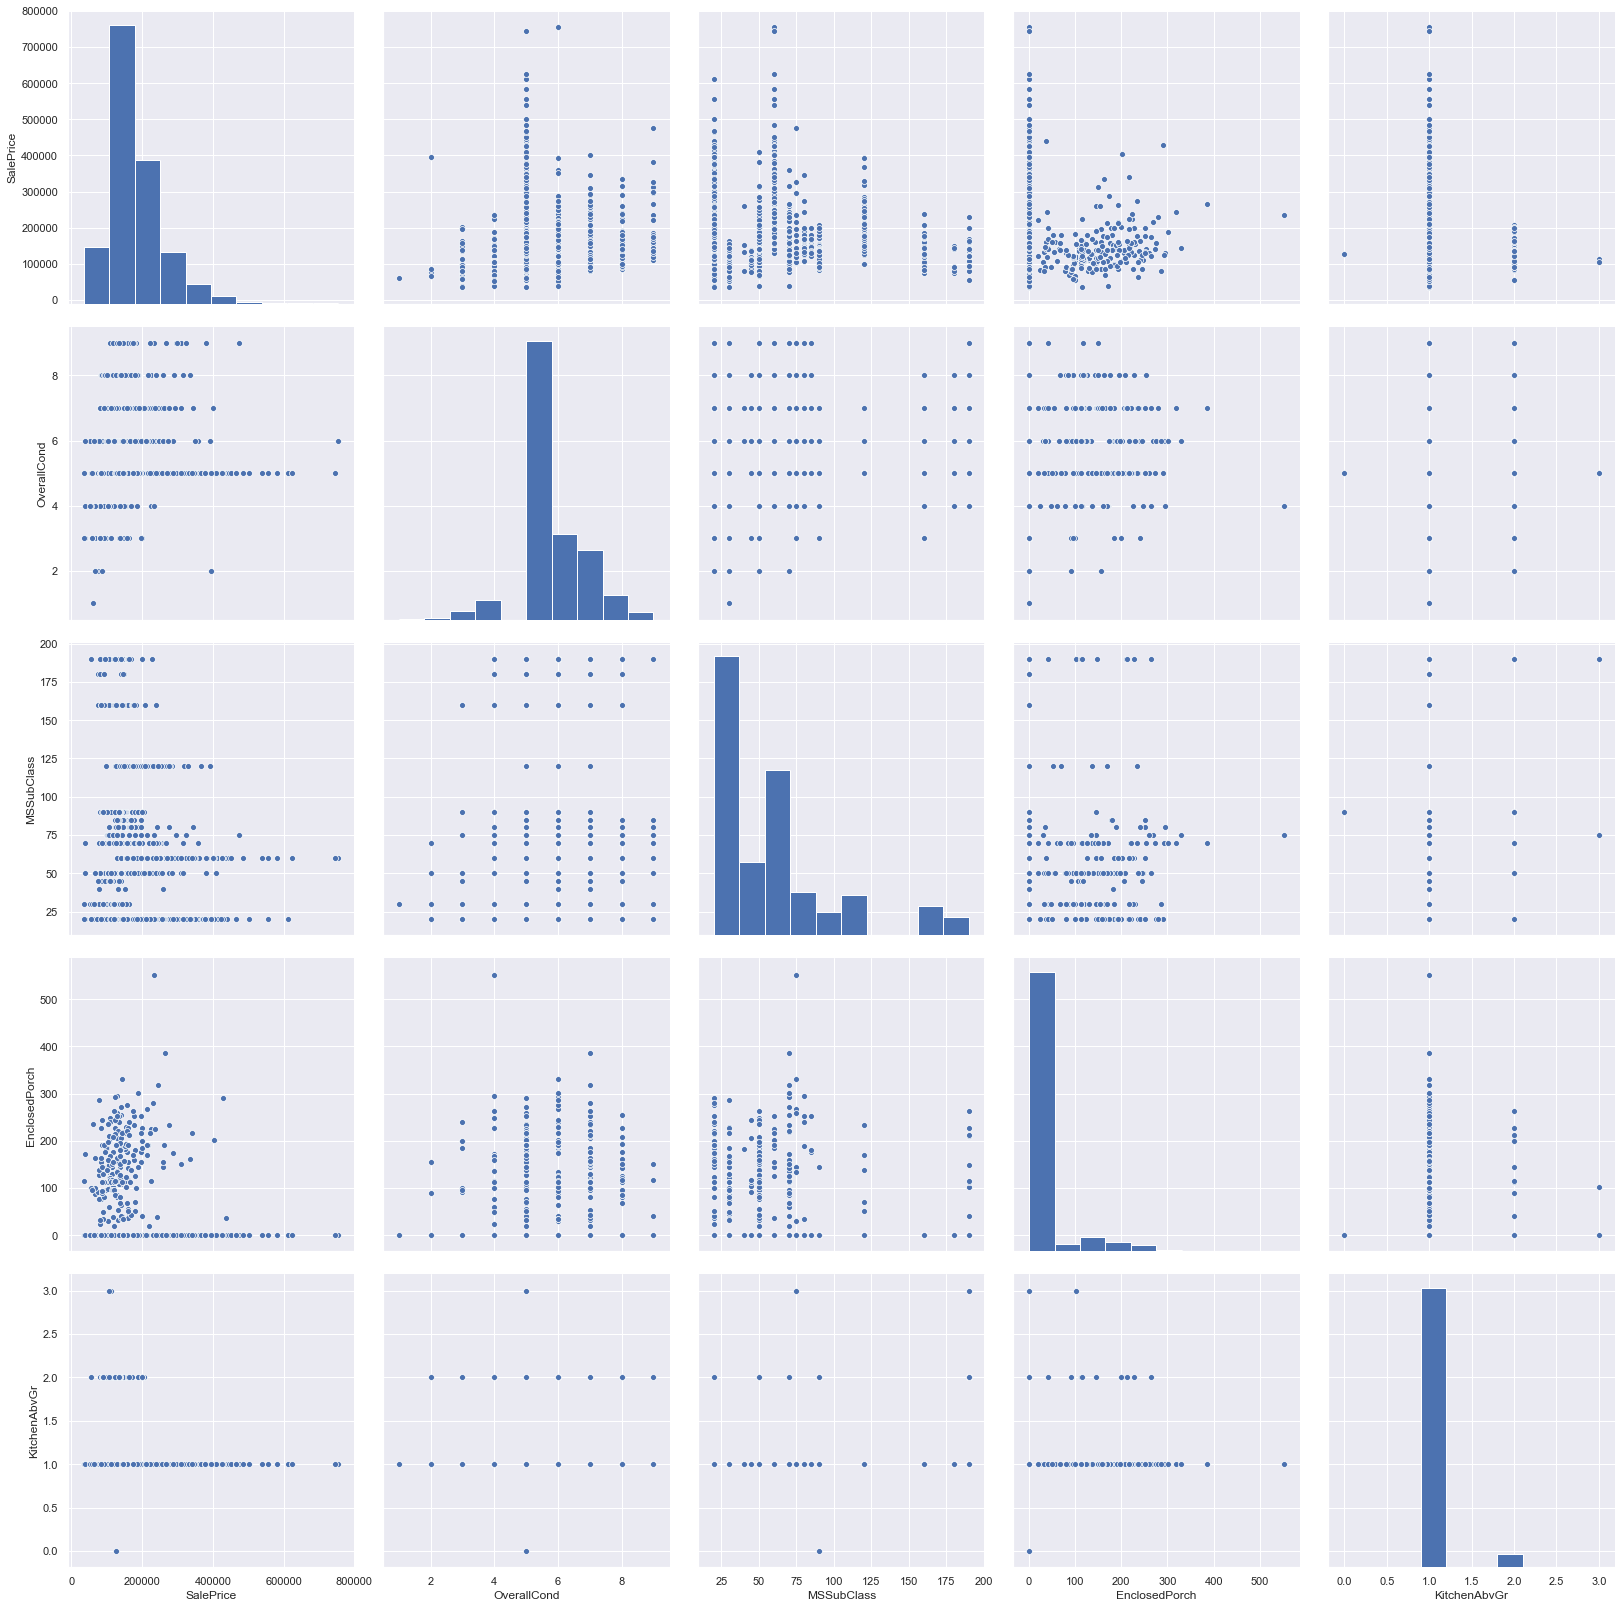

In [61]:
#Lets try to examine the least correalted variables with the target variable.
import matplotlib.pyplot as plt
sns.set()
cols = ['SalePrice','OverallCond', 'MSSubClass', 'EnclosedPorch','KitchenAbvGr']
sns.pairplot(train[cols], height = 4.5)
plt.show();

#It's quite surprising that the overall condition of the house does not make an impact on the sale price.Average and 
#above average conditions are good enough to shoot up the price of the house.The sale price variation with other variables
#are completely random and hence represents less correlation with the target variable.

In [92]:
#Observing the dependent variable.
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

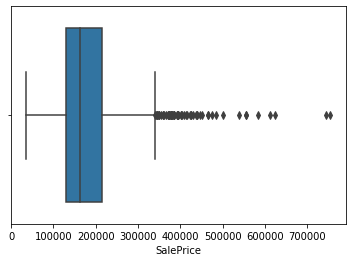

In [3]:

#From the above we can observe that 75% of the values seems to be below 214000 whereas the max value is 755000 which appears
#to be an outlier.So lets try to find out by boxplot.
import seaborn as sns
sns.boxplot(data = train, x = "SalePrice")

#We can indeed observe from the boxplot that there are two Sale Price which has a value of 755000 and which
#act as an extreme outlier here.

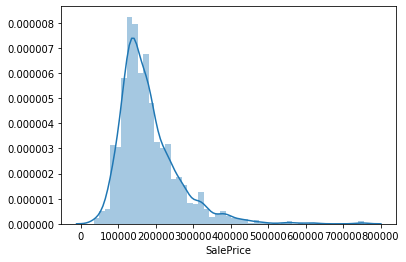

In [13]:
#Now lets try to understand if our output variable has skewness of any sort or is it normally distributed.
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.distplot(train['SalePrice'])
#We can in fact see that the distribution is rightly skewed.


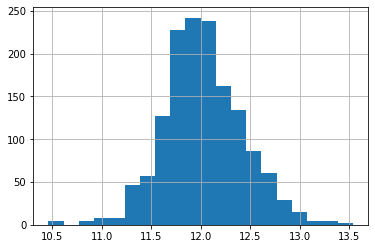

In [14]:
#Thus lets apply log transformation on the target variable which has diminishing impact on larger values and small
#impact on smaller values giving us uniform distribution.
train['SalePrice'] = train['SalePrice'].apply(np.log)
train['SalePrice'].hist(bins=20)
plt.show()
#Below is the target variable which is uniformly distributed.


In [15]:
#Imputation of MiscFeature.We see that the houses with shed are of high prices. So for a row if MiscFeature is NA and
# sale prices are higher than the mean price then MiscFeature is shed otherwise it is Othr.

train['MiscFeature'] = np.where(train['SalePrice'] > train['SalePrice'].mean(), train['MiscFeature'].fillna('Shed'), train['MiscFeature'].fillna('Othr'))

In [16]:
#Imputation of Alley. Generally Paved houses are of higher prices so every NA in alley is compared to its sale price 
#and if sale price is higher than the mean for that row then its pave otherwise Grvl.

train['Alley'] = np.where(train['SalePrice'] > train['SalePrice'].mean(), train['Alley'].fillna('Pave'), train['Alley'].fillna('Grvl'))

In [17]:
#Imputation of LotFrontage. The shape of the lot does have an impact on LotFrontage. So therfore LotFrontage is grouped by
#LotShape and then the mean imputation is applied on it.

train['LotFrontage'] = train.groupby('LotShape').LotFrontage.transform(lambda x: x.fillna(x.mean()))

In [18]:
#Imputation of GarageYrBlt. It has been observed that most of the garage was built in the same year as the house was built.
#Therefore if the GarageYrBlt value is NA then it is replaced with the year the house was built in.

train['GarageYrBlt'] = np.where(train['GarageYrBlt'].isna(), train['YearBuilt'], train['GarageYrBlt'])

In [19]:
#This column is just imputed by its mean.

train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)

In [20]:
#The below categorical columns imputation has been done through the mode of the column.

for column in ['Fence','FireplaceQu','BsmtExposure','MasVnrType','Electrical']:
    
    train[column].fillna(train[column].mode()[0], inplace=True)

In [21]:
#The below columns are ordinal in nature and therfore in order to establish the proper relationship, we had to provide 
#mappings of variables.

train['LotShape']=train['LotShape'].map({'IR3': 0, 'IR2': 1,'IR1': 2, 'Reg': 3})
train['Utilities']=train['Utilities'].map({'ELO': 0, 'NoSeWa': 1,'NoSewr': 2, 'AllPub': 3})
train['LandSlope']=train['LandSlope'].map({'Sev': 0, 'Mod': 1,'Gtl': 2})
train['ExterQual']=train['ExterQual'].map({'Po': 0, 'Fa': 1,'TA': 2, 'Gd': 3,'Ex':4})
train['ExterCond']=train['ExterCond'].map({'Po': 0, 'Fa': 1,'TA': 2, 'Gd': 3,'Ex':4})
train['BsmtQual']=train['BsmtQual'].map({'NA' : 0, 'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4,'Ex': 5})
train['BsmtCond']=train['BsmtCond'].map({'NA' : 0, 'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4,'Ex': 5})
train['BsmtExposure']=train['BsmtExposure'].map({'NA' : 0, 'No': 1, 'Mn': 2,'Av': 3, 'Gd': 4})
train['BsmtFinType1']=train['BsmtFinType1'].map({'NA' : 0, 'Unf': 1, 'LwQ': 2,'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
train['BsmtFinType2']=train['BsmtFinType2'].map({'NA' : 0, 'Unf': 1, 'LwQ': 2,'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
train['HeatingQC']=train['HeatingQC'].map({'NA' : 0, 'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4,'Ex': 5})
train['Electrical']=train['Electrical'].map({'Mix' : 0, 'FuseP': 1, 'FuseF': 2,'FuseA': 3, 'SBrkr': 4})
train['KitchenQual']=train['KitchenQual'].map({'Po': 0, 'Fa': 1,'TA': 2, 'Gd': 3,'Ex':4})
train['Functional']=train['Functional'].map({'Sal' : 0, 'Sev': 1, 'Maj2': 2,'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7})
train['FireplaceQu']=train['FireplaceQu'].map({'NA' : 0, 'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4,'Ex': 5})
train['GarageFinish']=train['GarageFinish'].map({'NA': 0, 'Unf': 1,'RFn': 2, 'Fin': 3})
train['GarageQual']=train['GarageQual'].map({'NA' : 0, 'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4,'Ex': 5})
train['GarageCond']=train['GarageCond'].map({'NA' : 0, 'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4,'Ex': 5})
train['PavedDrive']=train['PavedDrive'].map({'N': 0, 'P': 1,'Y': 2})
train['PoolQC']=train['PoolQC'].map({'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4,'Ex':5})
train['Fence']=train['Fence'].map({'NA': 0, 'MnWw': 1,'GdWo': 2, 'MnPrv': 3,'GdPrv':4})







In [22]:
#Some of the houses dont have the below features and therefore they are missing. So in such cases the missing values 
#are replaced with zero.

for column in ['GarageCond', 'GarageType','GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']:
    
            train[column].fillna(0, inplace=True)

In [23]:
#Imputation of PoolQC. Many houses do not have pool so if that is the case then pool quality is zero.

train['PoolQC'] = np.where(train['PoolArea']==0, 0, train['PoolQC']) 


In [24]:
#Checking if the imputation of all the columns have taken place properly.
train.isna().sum().sum()

0

In [25]:
#Separation of dependent and independent variables.

y = train.loc[:,'SalePrice']
X = train.loc[:, train.columns != 'SalePrice']

In [26]:
# Converting categorical variables into dummies.

X = pd.get_dummies(X)

In [27]:
#Checking the number of columns in the X dataframe after get_dummies.
X.shape

(1460, 220)

In [28]:
#sklearn splittting the dataset randomly into train set and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [29]:
# Standardize data using RobustScaler. This helps to overcome the effect of outliers while standarization

from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X_test = rc.transform(X_test)


In [30]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.feature_selection import RFE

In [231]:
#Without Hyper Parameters Tuning
#Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

training score: 0.9501886350987018
test score:  0.7623691198287817
r_square: 0.7893421380274167


In [232]:
#gridsearch cv for linear regression
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=8,  verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}
training score: 0.9501886350987018
test score:  0.7623691198287817
r_square: 0.7893421380274167


[Parallel(n_jobs=8)]: Done  22 out of  24 | elapsed:    5.1s remaining:    0.4s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:    5.1s finished
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [90]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=8)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn.metrics import r2_score
print("r_square:",r2_score(prediction,y_test))

training score: 0.950156748454817
test score:  0.757898276838342
r_square: 0.4350345313819175


In [91]:
#With Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
params = {'n_neighbors':[5,6,7],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X,y)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 108 out of 108 | elapsed:    6.3s finished


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'uniform'}
training score: -1.5367570301853997
test score:  0.6510020414695821
r_square: 0.4183974003781309


linear regression train score: 0.950156748454817
linear regression test score: 0.757898276838342
ridge regression train score low alpha: 0.9501540955040176
ridge regression test score low alpha: 0.7597366503414743
ridge regression train score high alpha: 0.9128895359003015
ridge regression test score high alpha: 0.8469204162472032


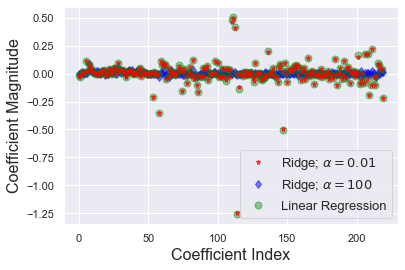

In [92]:
#Without Hyper Parameters Tuning
#Ridge
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [101]:
#With Hyper Parameters Tuning and grid search
#Ridge
ridge = Ridge(random_state=0, max_iter=10000)
alphas = [200, 230, 250,265, 270, 275, 290, 300, 500]
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
model1 = GridSearchCV(ridge, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
model1.fit(X, y)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  45 | elapsed:    0.0s remaining:    0.5s


Best Hyper Parameters:
 {'alpha': 200}
training score: -166.3050368246981
test score:  -173.669071256058
r2: -173.669071256058


[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    0.2s finished


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2, **kwargs):
    
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 'linearregression__fit_intercept': [True, False], 
              'linearregression__normalize': [True, False]}
model1 = GridSearchCV(PolynomialRegression(), param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)

model1.fit(X_train, y_train)
best_parameters = model1.best_params_
print(best_parameters)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   2.2s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   1.9s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   2.1s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   2.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polyno

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   41.8s finished
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


training score: 0.025791345538954014
test score:  0.03617892084025165
number of features used:  3
training score for alpha=0.01: 0.8852837507642176
test score for alpha =0.01:  0.812026330250482
number of features used: for alpha =0.01: 35
training score for alpha=0.0001: 0.9481921438723855
test score for alpha =0.0001:  0.7848240663015431
number of features used: for alpha =0.0001: 158


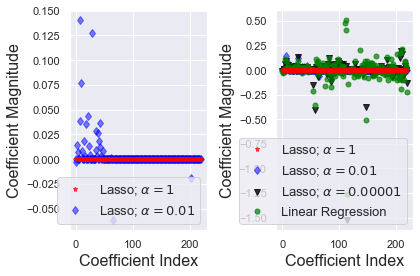

In [103]:
#Without Hyper Parameters Tuning
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [105]:
#With Hyper Parameters Tuning and grid search
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30, 20, 45)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
clf.fit(X, y)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=clf.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   26.3s


Best Hyper Parameters:
 {'alpha': 0.0006012927459941612}
training score: -46.787992357358455
test score:  -48.92038092055126
r2: -48.92038092055126


[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:   33.5s finished


In [109]:
#Without Hyper Parameters Tuning
#SVR
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=1.0, epsilon=0.2)
model1.fit(X_train,y_train)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

training score: 0.9115187349095674
test score:  0.7672002046550097
r2: 0.7672002046550097


In [108]:
#SVR with grid search 

from sklearn.model_selection import GridSearchCV
model= SVR()
parameters = {'kernel':['rbf','sigmoid','poly','linear'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=20), 
              'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=30)}
model1 = GridSearchCV(model, parameters, n_jobs=8, verbose=2)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score) 

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.3s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   17.5s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:   27.4s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:   40.2s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:   56.2s
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 3265 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 3600 out of 3600 | elapsed:  2.4min finished
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning

Best Hyper Parameters:
 {'C': 0.01306189880700996, 'gamma': 0.029722724624699017, 'kernel': 'sigmoid'}
training score: 0.7925137051003388
test score:  0.8099008902206828
r2: 0.8099008902206828


### Bagging with Linear SVM

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=6000, max_samples=800, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)
print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))


Train score: -4084115624088.52
Test score: -8720424582.33


### Bagging with K Neighbors Regressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=2000, max_samples=800, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.74
Test score: 0.66


### Pasting with linear regressor

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=1000, max_samples=900, bootstrap=False, random_state=0)

bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: -13152850269.13
Test score: -11061801.32


### Pasting with K Neighbors Regressor

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=1000, max_samples=900, bootstrap=False, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)


print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.74
Test score: 0.65


### ADA Boost using K Neighbors Regressor

In [54]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

knn_reg = KNeighborsRegressor()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.69


### ADA boost using Ridge

In [55]:
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import Ridge
ridge = Ridge()

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.66


### Gradient boosting on K Neighbour Regressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.967
Accuracy on test set: 0.888


In [57]:
gbrt = GradientBoostingRegressor(random_state=0, max_depth=3, learning_rate=0.1 , n_estimators=100)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.967
Accuracy on test set: 0.888


### PCA

In [68]:
from sklearn.decomposition import PCA # Will be importing PCA
pca = PCA(n_components=0.95) # Will need number of components which can result in 95% of variablity in data

In [69]:
X_training = pca.fit_transform(X_train) # fitting PCA to the scalled training dataset
X_testing = pca.transform(X_test)

In [70]:
X_training.shape

(1022, 2)

In [71]:
X_testing.shape

(438, 2)

In [72]:
pca.n_components_ #gives us the number of componets which will yield 95% of the accuracy

2

### Principal Component Analysis - Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg_1 = LinearRegression().fit(X_training, y_train)
cv_scores = cross_val_score(reg_1, X_training, y_train, cv=10)


In [75]:
print(" Mean Cross-validation score: {}".format(cv_scores.mean()))
print(reg_1.score(X_training,y_train))
prediction=model1.predict(X_testing)
print(reg_1.score(X_testing,y_test))
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

 Mean Cross-validation score: -0.018562369606818563
0.000715847862183927
-0.000470554915328325
r2: 0.07900634808968043


### Principal Component Analysis - With Lasso

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
#define a list of parameters
para_lasso = {'alpha':[0.00001, 0.0001, 0.001, 0.01,0.1,1.0,9,10, 100, 1000] }

In [78]:
lasso_grid = GridSearchCV(lasso, para_lasso, cv=10, return_train_score = True)
lasso_grid.fit(X_training, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 9, 10,
                                   100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [79]:
#finding best parameters for Lasso
print("Best Mean Cross-validation score: {:.2f}".format(lasso_grid.best_score_))
print('Lasso parameters: ', lasso_grid.best_params_)
print()

Best Mean Cross-validation score: -0.02
Lasso parameters:  {'alpha': 9}



In [80]:
# Checking data set performance
print("Lasso Train Performance: ", lasso_grid.score(X_training,y_train))
print("Lasso Test Performance: ", lasso_grid.score(X_testing,y_test))
from sklearn import metrics
prediction=model1.predict(X_testing)
print("r2:",metrics.r2_score(y_test,prediction))

Lasso Train Performance:  0.0
Lasso Test Performance:  -0.00020358904172468328
r2: 0.07900634808968043


### Principal Component Analysis-Linear Regression with Ridge

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [82]:
ridge = Ridge()
ridge_alpha ={'alpha':[0.00001, 0.0001, 0.001, 0.01,0.1,1.0,9,10, 100, 1000]}

In [83]:
g_ridge = GridSearchCV(ridge, ridge_alpha, cv=10, return_train_score = True)
g_ridge.fit(X_training, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 9, 10,
                                   100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [84]:
# finding best parameters
print("Best Cross-validation score: {:.2f}".format(g_ridge.best_score_))
print('Best parameters: ', g_ridge.best_params_)

Best Cross-validation score: -0.02
Best parameters:  {'alpha': 1000}


In [85]:
print("Ridge Train Performance: ", g_ridge.score(X_training,y_train))
print("Ridge Test Performance: ", g_ridge.score(X_testing,y_test))
from sklearn import metrics
prediction=model1.predict(X_testing)
print("r2:",metrics.r2_score(y_test,prediction))

Ridge Train Performance:  0.0007158478620770126
Ridge Test Performance:  -0.0004705484441476226
r2: 0.07900634808968043


### Principal Component Analysis- K Neighbors Regressor

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [87]:
knn_n_para = {'n_neighbors':[1,2,3,4,5,6],
             'metric':['euclidean','manhattan','minkowski']}

In [88]:
knn = KNeighborsRegressor()

In [89]:
knn_grid = GridSearchCV(knn, knn_n_para, cv=10,return_train_score=True)

In [90]:
knn_grid.fit(X_training, y_train)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [91]:
#finding the best parameters
print('Best cross-validation score:', knn_grid.best_score_)
print('Best parameters: ', knn_grid.best_params_)
print('Best estimator: ', knn_grid.best_estimator_)

Best cross-validation score: 0.3189093704136083
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 6}
Best estimator:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')


In [92]:
# Checking the data set performance
print('train score: ', knn_grid.score(X_training,y_train))
print('test score: ', knn_grid.score(X_testing, y_test))
from sklearn import metrics
prediction=model1.predict(X_testing)
print("r2:",metrics.r2_score(y_test,prediction))

train score:  0.525014798664867
test score:  0.40610544193769726
r2: 0.07900634808968043


### Principal Component Analysis-Decision Tree Regressor

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor(random_state = 0)

#define a list of parameters
param_dec_tree = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

#apply grid search
grid_dec_tree = GridSearchCV(dtree, param_dec_tree, cv=10, return_train_score = True)
grid_dec_tree.fit(X_training, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=T

In [94]:
print('Best parameters: ',grid_dec_tree.best_params_)
print("Accuracy on training set: {:.3f}".format(grid_dec_tree.score(X_training, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_dec_tree.score(X_testing, y_test)))

Best parameters:  {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Accuracy on training set: 0.295
Accuracy on test set: 0.265


In [95]:
# Check data set performance
print("Decision Tree Train Performance: ", grid_dec_tree.score(X_training,y_train))
print("Decision Tree Test Performance: ", grid_dec_tree.score(X_testing,y_test))
from sklearn import metrics
prediction=model1.predict(X_testing)
print("r2:",metrics.r2_score(y_test,prediction))

Decision Tree Train Performance:  0.29508211113353944
Decision Tree Test Performance:  0.2653762616146679
r2: 0.07900634808968043


### Principal Component Analysis-Linear Polynomial Regression

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [97]:
poly_func = PolynomialFeatures()
lreg_func = LinearRegression()

In [98]:
#defining a list of parameters
param_poly_regre = {'polynomialfeatures__degree':range(1,3)}

In [99]:
pipe_poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())

In [100]:
grid_poly_reg = GridSearchCV(pipe_poly_reg, param_poly_regre,cv=10, return_train_score = True,n_jobs= -1)

In [101]:
grid_poly_reg.fit(X_training, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'polynomialfeatures__degree': range(1, 3)},
             pre_dispatch='2*n_

In [102]:
#finding best parameters
print("Best Mean Cross-validation score: {:.2f}".format(grid_poly_reg.best_score_))
print('Poly parameters: ', grid_poly_reg.best_params_)
print()

Best Mean Cross-validation score: -0.02
Poly parameters:  {'polynomialfeatures__degree': 1}



In [103]:
# Checking data set performance
print("Poly Train Performance Train : ", grid_poly_reg.score(X_training,y_train))
print("Poly Test Performance Test : ", grid_poly_reg.score(X_testing,y_test))
from sklearn import metrics
prediction=model1.predict(X_testing)
print("r2:",metrics.r2_score(y_test,prediction))

Poly Train Performance Train :  0.000715847862183705
Poly Test Performance Test :  -0.000470554915328325
r2: 0.07900634808968043


### Principal Component Analysis - Linear Support Vector Machine

In [104]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grd_svr_kernel = GridSearchCV(svr, param_grid, cv=10, n_jobs=-1, scoring='r2',)
grd_svr_kernel.fit(X_training, y_train)
print("Best Mean Cross-validation score: {:.2f}".format(grd_svr_kernel.best_score_))
print(grd_svr_kernel.best_params_)
print('train score: ', grd_svr_kernel.score(X_training, y_train))
print('test score: ', grd_svr_kernel.score(X_testing, y_test))
from sklearn import metrics
prediction=model1.predict(X_testing)
print("r2:",metrics.r2_score(y_test,prediction))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Mean Cross-validation score: -11.18
{'C': 100}
train score:  -22.300650270481785
test score:  -3.068253534608541
r2: 0.07900634808968043


### Principal Component Analysis - Support Vector Machine

In [65]:
#SVR with grid search 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
model= SVR()
parameters = {'kernel':['rbf','Poly','Sigmoid','linear'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=20), 
              'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=30)}
model1 = GridSearchCV(model, parameters, n_jobs=-1, verbose = 1)
model1.fit(X_training, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_testing)
train_score=model1.score(X_training,y_train)
test_score=model1.score(X_testing,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score) 

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 1252 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.0min finished
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Hyper Parameters:
 {'C': 0.1706132004445682, 'gamma': 0.3714098733002543, 'kernel': 'rbf'}
training score: 0.11820621642245666
test score:  0.07900634808968043
r2: 0.07900634808968043


### Deep Learning Model on Regression

In [43]:
import keras as ks
import tensorflow as tf

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [54]:
modelR= Sequential()
modelR.add(Dense(220, input_dim =220, kernel_initializer ='normal',activation ='relu'))
modelR.add(Dense(1, kernel_initializer ='normal',activation ='relu'))

In [55]:
modelR.compile(loss='mse',optimizer='sgd', metrics =['mse'])

In [50]:
X_train.shape

(1022, 220)

In [56]:
modelR.fit(X_train, y_train,epochs = 100, batch_size = 30)

Epoch 1/100
1022/1022 [==============================] - 0s 394us/step - loss: 141.3294 - mse: 141.3294
Epoch 2/100
1022/1022 [==============================] - 0s 139us/step - loss: 144.6989 - mse: 144.6989
Epoch 3/100
1022/1022 [==============================] - 0s 218us/step - loss: 144.6989 - mse: 144.6989
Epoch 4/100
1022/1022 [==============================] - 0s 157us/step - loss: 144.6989 - mse: 144.6989
Epoch 5/100
1022/1022 [==============================] - 0s 307us/step - loss: 144.6989 - mse: 144.6989
Epoch 6/100
1022/1022 [==============================] - 0s 165us/step - loss: 144.6989 - mse: 144.6989
Epoch 7/100
1022/1022 [==============================] - 0s 230us/step - loss: 144.6989 - mse: 144.6989
Epoch 8/100
1022/1022 [==============================] - 0s 99us/step - loss: 144.6989 - mse: 144.6989
Epoch 9/100
1022/1022 [==============================] - 0s 190us/step - loss: 144.6989 - mse: 144.6989
Epoch 10/100
1022/1022 [==============================] - 0s 217u

In [57]:
modelR.evaluate(X_test, y_test)

438/438 [==============================] - 0s 410us/step


[144.82674000361195, 144.8267364501953]

In [58]:
from sklearn.metrics import r2_score, recall_score, precision_score
y_train_predict = modelR.predict(X_train)
y_test_predict = modelR.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train,y_train_predict)))
print('Train score: {:.2f}'.format(r2_score(y_test,y_test_predict)))

Train score: -894.63
Train score: -936.32


In [107]:
columns = ['Model','Train_Score','Train_Score_With_PCA','Test_Score','Test_Score_With_PCA', 'R_square','R_square_With_PCA']
reg_model = pd.DataFrame(columns=columns)

In [109]:
comp = [ ('Linear_regression', 0.95, 0.0007, 0.76, -0.0004, 0.78, 0.07) ,
             ('KNN', -1.53, 0.5250, 0.65, 0.4061, 0.41, 0.0790 ) ,
             ('Ridge', -166.30, 0.0007, -173.66, -0.0004, -173.66, 0.07) ,
             ('Polynomial', -0.008, 0.0007, -0.03, -0.0004, 0.78, 0.079 ) ,
             ('Lasso', -46.78, 0.0 , -48.92, -0.0002, -48.92, 0.07) ,
             ('SVR', 0.79, 0.118, 0.80, 0.079, 0.80, 0.079)  ]

In [110]:
compare = pd.DataFrame(comp, columns = ['Model','Train_Score','Train_Score_With_PCA','Test_Score','Test_Score_With_PCA', 'R_square','R_square_With_PCA'])

In [111]:
compare

,Model,Train_Score,Train_Score_With_PCA,Test_Score,Test_Score_With_PCA,R_square,R_square_With_PCA
0,Linear_regression,0.950,0.0007,0.76,-0.0004,0.78,0.070
1,KNN,-1.530,0.5250,0.65,0.4061,0.41,0.079
2,Ridge,-166.300,0.0007,-173.66,-0.0004,-173.66,0.070
3,Polynomial,-0.008,0.0007,-0.03,-0.0004,0.78,0.079
4,Lasso,-46.780,0.0000,-48.92,-0.0002,-48.92,0.070
5,SVR,0.790,0.1180,0.80,0.0790,0.80,0.079


#### In this regression dataset, PCA is definitely not doing a good job as train_Score, test_score and R square values are very low as compared to the scores that we got without performing PCA on the model. Deep neural method is also not producing any good result. While the other models such as Bagging, Boosting , Adaboost and GradientBoost are giving above 90 percent score on train data but lower scores are obtained on test data. Thus, this is an indication of overfitting. 